<a href="https://colab.research.google.com/github/dianagu55/amazon-ecomerce-data-analysis/blob/main/Water_bottler_Reviewed_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gensim

In [2]:
# 1. Setup
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from gensim import corpora, models
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# 2. Load Data
reviews = pd.read_csv("part1-water-bottle-reviewed-data.csv")
reviews = reviews[['Body', 'Rating']].dropna()
reviews = reviews.rename(columns={'Body': 'reviewText', 'Rating': 'overall'})

In [4]:
# 3. Sentiment Analysis
reviews['sentiment'] = reviews['reviewText'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [5]:
reviews_sorted = reviews.sort_values(by='sentiment', ascending=True)
reviews_sorted[['reviewText', 'sentiment','overall']]

,reviewText,sentiment,overall
79,My daughter took this to school two days and i...,-0.937500,1
39,I am returning this after it tested positive f...,-0.393182,1
47,Coldness not good and handle broke and I rate -10,-0.350000,1
66,This water bottle doesn’t keep your water cold...,-0.270833,1
81,Very bad quality lid. Broke very easily.,-0.173333,1
...,...,...,...
61,Cup seems sturdy top not,0.500000,3
55,The bottle fits in car holder. It keeps ice up...,0.611111,4
19,I work in a warehouse and my cup fell 4 feet t...,0.625000,5
92,"Good size and quality for price, excellent ins...",0.626667,5


Buyers are complaining that the water bottle is not worth it. They claim that the water does not stay cold and that the product is poorly manufactured, leading to a 1-star rating.

On the other hand, some buyers give it a 5-star rating and express a different opinion. I also noticed that some comments reflect the same feelings but receive higher ratings, while some users share the same sentiment yet give a lower rating. As discussed in the class, this discrepancy might be due to rewards or incentives that encourage buyers to leave negative comments while still giving higher ratings. Alternatively, they might simply feel compelled to do so.

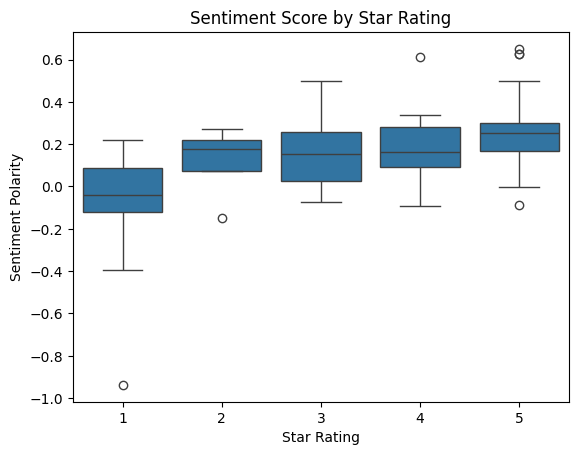

In [6]:
# 4. Visualization
sns.boxplot(data=reviews, x='overall', y='sentiment')
plt.title('Sentiment Score by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Sentiment Polarity')
plt.show()

**Positive Correlation:**

As star ratings increase from 1 to 5, the median sentiment polarity also increases, indicating that higher star ratings tend to be associated with more positive sentiment.

**1-Star Reviews:**

These have a wide range of sentiment scores, including many strongly negative values (close to -1).

The median is below 0, confirming generally negative sentiment.

**2-Star and 3-Star Review**s:

These are mixed, with a balanced range of negative and slightly positive sentiments.

Medians are around 0, indicating neutral to slightly negative sentiment.

**4-Star and 5-Star Reviews:**

These skew positively.

The 4-star median is well above 0, and the 5-star has the highest median sentiment, as expected.

5-star reviews also show more variability but tend to be strongly positive overall.

**Outliers:**

Negative sentiment even appears in some 4- and 5-star reviews, which may suggest sarcastic or complex reviews.



/tmp/ipython-input-1032568786.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=reviews, x='overall', palette='viridis')


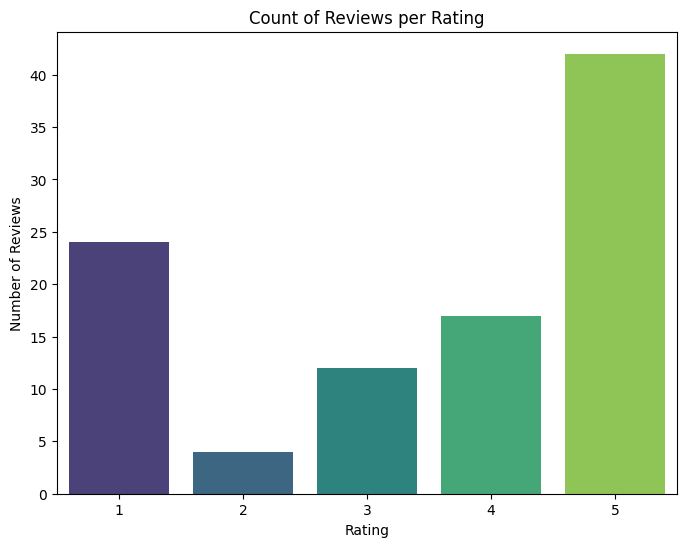

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(data=reviews, x='overall', palette='viridis')
plt.title('Count of Reviews per Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()


*  5-star reviews are the most frequent, with ~175 reviews. This suggests a large group of highly satisfied users.
*   1-star reviews are also high, second only to 5-stars (~150 reviews), which indicates polarized user experiences.


* Ratings 2 to 4 stars have significantly fewer reviews, ranging from ~110 to ~120.

This can mean that users are more likely to leave a review when they feel strongly, either positively or negatively.










In [8]:
# 5. Topic Modeling
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(str(text).lower())
    return [w for w in tokens if w.isalpha() and w not in stop_words and len(w) > 2]

reviews['tokens'] = reviews['reviewText'].apply(preprocess)

In [9]:
reviews

,reviewText,overall,sentiment,tokens
0,Sleek and good quality. Tested 2 out of the 3 ...,5,0.285417,"[sleek, good, quality, tested, lids, two, test..."
1,After spending a week this past July in Las Ve...,4,0.107046,"[spending, week, past, july, las, vegas, reall..."
2,This comes with three different style lids all...,5,0.008333,"[comes, three, different, style, lids, handle,..."
3,Update: I just realized that the rubber mouth ...,1,-0.166667,"[update, realized, rubber, mouth, piece, lid, ..."
4,This water bottle is a good value for the pric...,4,0.187500,"[water, bottle, good, value, price, sturdy, op..."
...,...,...,...,...
94,"Me encantoooo este termo! Está precioso, suuuu...",5,0.000000,"[encantoooo, este, termo, está, precioso, suuu..."
95,This water bottle has good lids that don't lea...,1,0.020707,"[water, bottle, good, lids, leak, good, thing,..."
96,Durability= seems like a strong bottle that yo...,1,0.208333,"[seems, like, strong, bottle, long, put, ice, ..."
97,Water doesn’t stay cold and ice melts very qui...,1,0.065741,"[water, stay, cold, ice, melts, quickly, examp..."


In [10]:
dictionary = corpora.Dictionary(reviews['tokens'])
corpus = [dictionary.doc2bow(text) for text in reviews['tokens']]
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=20)
lda_model.show_topics()

[(0,
  '0.021*"bottle" + 0.015*"water" + 0.015*"cold" + 0.012*"lids" + 0.011*"lid" + 0.011*"love" + 0.010*"hours" + 0.009*"good" + 0.009*"ice" + 0.009*"one"'),
 (1,
  '0.032*"water" + 0.030*"bottle" + 0.012*"use" + 0.011*"straw" + 0.009*"lid" + 0.009*"like" + 0.009*"ice" + 0.008*"cold" + 0.008*"color" + 0.007*"handle"'),
 (2,
  '0.024*"water" + 0.022*"bottle" + 0.018*"lid" + 0.013*"like" + 0.009*"lids" + 0.009*"spout" + 0.008*"ice" + 0.007*"bottles" + 0.007*"one" + 0.007*"nice"')]

In [11]:
dictionary = corpora.Dictionary(reviews['tokens'])
corpus = [dictionary.doc2bow(text) for text in reviews['tokens']]
lda_model = models.LdaModel(corpus, num_topics=2, id2word=dictionary, passes=20)
lda_model.print_topics()

[(0,
  '0.031*"bottle" + 0.030*"water" + 0.015*"lid" + 0.010*"ice" + 0.010*"straw" + 0.009*"lids" + 0.009*"like" + 0.008*"cold" + 0.008*"use" + 0.007*"good"'),
 (1,
  '0.012*"bottle" + 0.012*"water" + 0.010*"lids" + 0.009*"cold" + 0.006*"lid" + 0.006*"durable" + 0.006*"straws" + 0.006*"one" + 0.006*"like" + 0.006*"bought"')]

# Filter for <=3 ratings

In [12]:
negative_reviews = reviews[reviews['overall'] <= 3]
negative_reviews['tokens'] = negative_reviews['reviewText'].apply(preprocess)

/tmp/ipython-input-2551902449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['tokens'] = negative_reviews['reviewText'].apply(preprocess)


In [13]:
dictionary = corpora.Dictionary(negative_reviews['tokens'])
corpus = [dictionary.doc2bow(text) for text in negative_reviews['tokens']]
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=20)
lda_model.print_topics()

[(0,
  '0.033*"bottle" + 0.021*"water" + 0.014*"handle" + 0.012*"broke" + 0.011*"good" + 0.011*"lid" + 0.009*"use" + 0.008*"one" + 0.008*"top" + 0.007*"even"'),
 (1,
  '0.038*"water" + 0.018*"bottle" + 0.015*"lid" + 0.012*"like" + 0.012*"spout" + 0.011*"one" + 0.009*"drink" + 0.008*"keep" + 0.008*"would" + 0.008*"bought"'),
 (2,
  '0.023*"water" + 0.017*"lid" + 0.016*"bottle" + 0.014*"top" + 0.010*"straw" + 0.010*"like" + 0.010*"use" + 0.009*"ice" + 0.009*"even" + 0.007*"cold"')]

# Adding common phrases

In [14]:
from gensim.models import Phrases
bigram = Phrases(reviews['tokens'], min_count=3, threshold=5)
bigram_mod = Phrases(bigram[reviews['tokens']])
reviews['tokens'] = [bigram[doc] for doc in reviews['tokens']]

In [15]:
reviews

,reviewText,overall,sentiment,tokens
0,Sleek and good quality. Tested 2 out of the 3 ...,5,0.285417,"[sleek, good, quality, tested, lids, two, test..."
1,After spending a week this past July in Las Ve...,4,0.107046,"[spending, week, past, july, las, vegas, reall..."
2,This comes with three different style lids all...,5,0.008333,"[comes, three, different, style, lids, handle,..."
3,Update: I just realized that the rubber mouth ...,1,-0.166667,"[update, realized, rubber, mouth, piece, lid, ..."
4,This water bottle is a good value for the pric...,4,0.187500,"[water_bottle, good, value, price, sturdy, opt..."
...,...,...,...,...
94,"Me encantoooo este termo! Está precioso, suuuu...",5,0.000000,"[encantoooo, este, termo, está, precioso, suuu..."
95,This water bottle has good lids that don't lea...,1,0.020707,"[water_bottle, good, lids, leak, good, thing, ..."
96,Durability= seems like a strong bottle that yo...,1,0.208333,"[seems, like, strong, bottle, long, put, ice_m..."
97,Water doesn’t stay cold and ice melts very qui...,1,0.065741,"[water, stay, cold, ice_melts, quickly, exampl..."


In [16]:
dictionary = corpora.Dictionary(reviews['tokens'])
corpus = [dictionary.doc2bow(text) for text in reviews['tokens']]
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=20)
lda_model.print_topics()

[(0,
  '0.019*"cold" + 0.016*"water" + 0.013*"water_bottle" + 0.010*"ice" + 0.010*"like" + 0.010*"keep" + 0.009*"bottle" + 0.009*"drink" + 0.008*"keeps" + 0.008*"bought"'),
 (1,
  '0.015*"bottle" + 0.013*"lid" + 0.013*"water" + 0.013*"water_bottle" + 0.010*"use" + 0.009*"like" + 0.009*"love" + 0.008*"one" + 0.008*"even" + 0.008*"straw"'),
 (2,
  '0.020*"bottle" + 0.014*"lids" + 0.012*"top" + 0.009*"insulated" + 0.009*"water" + 0.008*"water_bottle" + 0.008*"quality" + 0.008*"good" + 0.008*"lid" + 0.007*"straw"')]

In [17]:
negative_reviews = reviews[reviews['overall'] <= 3]
negative_reviews['tokens'] = negative_reviews['reviewText'].apply(preprocess)
dictionary = corpora.Dictionary(negative_reviews['tokens'])
corpus = [dictionary.doc2bow(text) for text in negative_reviews['tokens']]
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=20)
lda_model.print_topics()

/tmp/ipython-input-1734944771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['tokens'] = negative_reviews['reviewText'].apply(preprocess)


[(0,
  '0.026*"lid" + 0.025*"top" + 0.020*"bottle" + 0.016*"water" + 0.014*"use" + 0.011*"spout" + 0.011*"one" + 0.011*"straw" + 0.010*"like" + 0.009*"drink"'),
 (1,
  '0.021*"water" + 0.017*"bottle" + 0.011*"would" + 0.011*"lid" + 0.009*"good" + 0.007*"even" + 0.007*"cold" + 0.007*"drink" + 0.007*"major" + 0.007*"got"'),
 (2,
  '0.042*"water" + 0.026*"bottle" + 0.013*"ice" + 0.012*"bought" + 0.009*"even" + 0.009*"handle" + 0.009*"like" + 0.009*"get" + 0.008*"cold" + 0.008*"one"')]

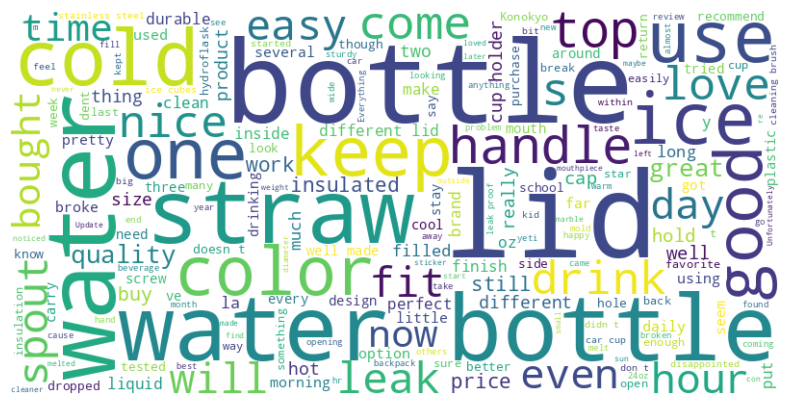

In [18]:
from wordcloud import WordCloud

text = " ".join(reviews['reviewText'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Trying facebook model

In [19]:
!pip install transformers

In [20]:
from transformers import pipeline

# Load the zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [21]:
candidate_labels = [
   "High Quality",
    "Maintains Temperature",
    "Easy to Carry",
    "Misfit Straw",
    "Dishwasher Safe",
    "Affordable Price",
    "Leak-Proof"
]


I decided to label all the common words that majoraty of the customer mention about the water. I included postive and negative words from the costumers comments.

In [22]:
review = "The straw does not fit all the way to the bottom of the bottle."

result = classifier(review, candidate_labels, multi_label=False)

print("Predicted label:", result['labels'][0])
print("Confidence:", result['scores'][0])


Predicted label: Misfit Straw
Confidence: 0.43331170082092285


In [23]:
reviews['zero_shot_label'] = reviews['reviewText'].apply(
    lambda x: classifier(str(x), candidate_labels, multi_label=False)['labels'][0]
)

In [24]:
reviews

,reviewText,overall,sentiment,tokens,zero_shot_label
0,Sleek and good quality. Tested 2 out of the 3 ...,5,0.285417,"[sleek, good, quality, tested, lids, two, test...",High Quality
1,After spending a week this past July in Las Ve...,4,0.107046,"[spending, week, past, july, las, vegas, reall...",High Quality
2,This comes with three different style lids all...,5,0.008333,"[comes, three, different, style, lids, handle,...",High Quality
3,Update: I just realized that the rubber mouth ...,1,-0.166667,"[update, realized, rubber, mouth, piece, lid, ...",Easy to Carry
4,This water bottle is a good value for the pric...,4,0.187500,"[water_bottle, good, value, price, sturdy, opt...",Affordable Price
...,...,...,...,...,...
94,"Me encantoooo este termo! Está precioso, suuuu...",5,0.000000,"[encantoooo, este, termo, está, precioso, suuu...",High Quality
95,This water bottle has good lids that don't lea...,1,0.020707,"[water_bottle, good, lids, leak, good, thing, ...",Maintains Temperature
96,Durability= seems like a strong bottle that yo...,1,0.208333,"[seems, like, strong, bottle, long, put, ice_m...",Easy to Carry
97,Water doesn’t stay cold and ice melts very qui...,1,0.065741,"[water, stay, cold, ice_melts, quickly, exampl...",Maintains Temperature


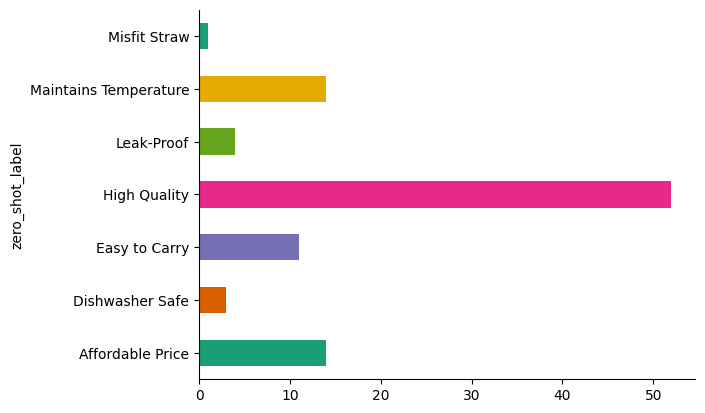

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns
reviews.groupby('zero_shot_label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [26]:
reviews[reviews['zero_shot_label'] == 'High Quality']

,reviewText,overall,sentiment,tokens,zero_shot_label
0,Sleek and good quality. Tested 2 out of the 3 ...,5,0.285417,"[sleek, good, quality, tested, lids, two, test...",High Quality
1,After spending a week this past July in Las Ve...,4,0.107046,"[spending, week, past, july, las, vegas, reall...",High Quality
2,This comes with three different style lids all...,5,0.008333,"[comes, three, different, style, lids, handle,...",High Quality
8,My husband is a construction worker all while ...,5,0.263859,"[husband, construction, worker, live, midwest,...",High Quality
9,We just bought a truck to tow our rv and my wa...,4,0.129817,"[bought, truck, tow, water_bottle, right, woul...",High Quality
13,Our new car has smaller cup holders than our p...,5,0.170902,"[new, car, smaller, cup, holders, previous, ve...",High Quality
15,I just love this water bottle and so will you....,5,0.263492,"[love, water_bottle, nothing, wrong, bottle, p...",High Quality
16,Love the color and the cup but disappointed th...,4,0.050000,"[love_color, cup, disappointed, fit, car_cup, ...",High Quality
17,The bottle works very well love the quality an...,4,0.233333,"[bottle, works, well, love, quality, lids, com...",High Quality
19,I work in a warehouse and my cup fell 4 feet t...,5,0.625000,"[work, warehouse, cup, fell, feet, paint, chip...",High Quality


The reviews show a strong polarization in customer opinions. Buyers who gave a 1-star rating frequently complain about the water bottle's poor insulation, stating that it fails to keep water cold. They also mention issues with the product's manufacturing quality.

Conversely, customers who left 5-star reviews express the opposite sentiment, praising the bottle's performance.

Interestingly, some reviews with similar complaints about product quality have vastly different ratings. For instance, a customer might complain about a specific flaw and still give a high rating, while another customer with the same issue gives a low rating. This discrepancy could be attributed to a variety of factors, such as customer expectations, or other external incentives.